# Fit of `B0_M` with the MC data
- cut on $\Delta M$ : $143 MeV < \Delta M < 148 MeV$
- Double CB fit on the MC data

## Libraries

In [1]:
import numpy as np
import zfit
import matplotlib.pyplot as plt
import json
#Gives us nice LaTeX fonts in the plots
from matplotlib import rc
rc('font',**{'family':'serif','serif':['Roman']})
rc('text', usetex=True)


from bd2dst3pi.locations import loc
from bd2dst3pi.definitions import years, magnets


import sys
sys.path.append(loc.SCRIPTS)
import functions as f
from fit import launch_fit, plot_hist_fit, save_params

Welcome to JupyROOT 6.22/02


## Retrieve data

In [2]:
df_MC = f.load_data(years,magnets,type_data = 'MC',vars = ['B0_M','tau_M'],cut_DeltaM = True)

/eos/lhcb/wg/semileptonic/RXcHad/B02Dsttaunu/Run2/ntuples//norm/Bd_Dst3pi/Bd_Dst3pi_11266018_2015_up_Sim09e-ReDecay01.root
/eos/lhcb/wg/semileptonic/RXcHad/B02Dsttaunu/Run2/ntuples//norm/Bd_Dst3pi/Bd_Dst3pi_11266018_2015_down_Sim09e-ReDecay01.root
/eos/lhcb/wg/semileptonic/RXcHad/B02Dsttaunu/Run2/ntuples//norm/Bd_Dst3pi/Bd_Dst3pi_11266018_2016_up_Sim09e-ReDecay01.root
/eos/lhcb/wg/semileptonic/RXcHad/B02Dsttaunu/Run2/ntuples//norm/Bd_Dst3pi/Bd_Dst3pi_11266018_2016_down_Sim09e-ReDecay01.root


## Plot 1D histograms

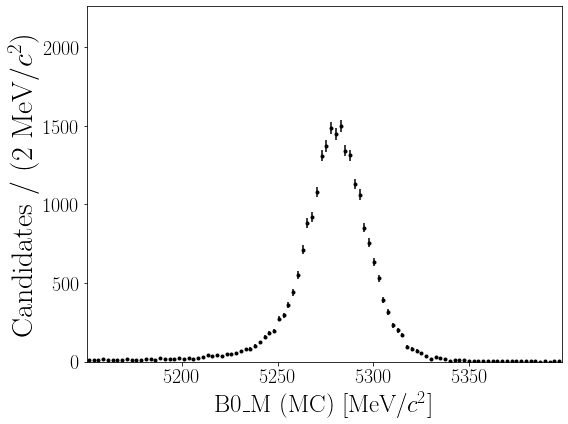

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/MC/B0_M_MC.pdf


In [3]:
f.plot_hist({'MC':df_MC},'B0_M','B0\_M (MC)','MeV/$c^2$', n_bins = 100,name_folder = 'MC',colors='black')

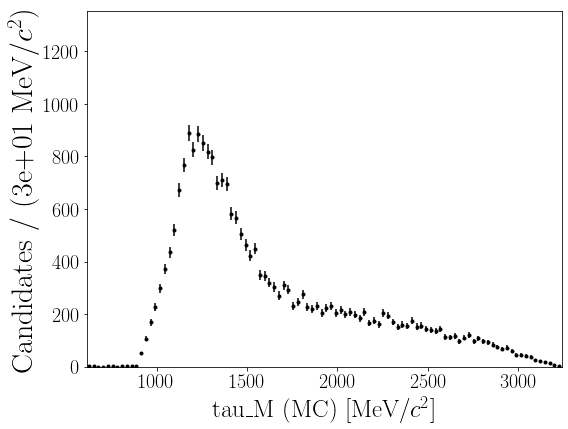

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/MC/tau_M_MC.pdf


In [4]:
f.plot_hist({'MC':df_MC},'tau_M','tau\_M (MC)','MeV/$c^2$', n_bins = 100,name_folder = 'MC',colors = 'black')

## A function to launch the fit

This function has been implemented in `scripts/fit.py`

## Double CB Fit of `B0_M` of the MC data

In [3]:
low = 5050.
high = 5550.
obs = zfit.Space("x", limits=(low, high))

In [4]:
mu_MC = zfit.Parameter("mu_MC", 5280., 5250., 5300.)
sigma_MC = zfit.Parameter("sigma_MC", 20., 10., 60.)
alphaL_MC = zfit.Parameter("alphaL_MC", 2., 0.1, 5.)
alphaR_MC = zfit.Parameter("alphaR_MC", 2., 0.1, 5.)
nL_MC = zfit.Parameter("nL_MC", 2., 0.01, 10.)
nR_MC = zfit.Parameter("nR_MC", 2., 0.01, 10.)


In [5]:
name_params = {
    'mu_MC':'$\mu$',
    'sigma_MC':'$\sigma$',
    'alphaL_MC':'$\\alpha_L$',
    'alphaR_MC':'$\\alpha_R$',
    'nL_MC':'$n_L$',
    'nR_MC':'$n_R$',
}

In [6]:
doubleCB_MC = zfit.pdf.DoubleCB(mu_MC, sigma_MC, alphaL_MC, alphaR_MC, nL_MC, nR_MC, obs=obs)
data_MC = zfit.Data.from_pandas(df_MC['B0_M'],obs=obs)

In [7]:
result, params = launch_fit(doubleCB_MC, data_MC)
save_params(params,'MC')

------------------------------------------------------------------
| FCN = 1.043e+05               |     Ncalls=392 (392 total)     |
| EDM = 0.000569 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
name         value    minuit_hesse         minuit_minos    at limit
---------  -------  --------------  -------------------  ----------
alphaL_MC    1.326     +/-   0.036  -  0.034   +  0.036     

/afs/cern.ch/user/c/correian/bd2dst3pi/scripts/fit.py:270: UserWarning: The function <function Space.limits at 0x7f3813b6c3b0> may does not return the actual area/limits but rather the rectangular limits. <zfit Space obs=('x',), axes=None, limits=(array([[5050.]]), array([[5550.]]))> can also have functional limits that are arbitrarily defined and lay inside the rect_limits. To test if a value is inside, use `inside` or `filter`.
  low = float(obs.limits[0])
/afs/cern.ch/user/c/correian/bd2dst3pi/scripts/fit.py:105: UserWarning: The function <function Space.area at 0x7f3813b727a0> may does not return the actual area/limits but rather the rectangular limits. <zfit Space obs=('x',), axes=None, limits=(array([[5050.]]), array([[5550.]]))> can also have functional limits that are arbitrarily defined and lay inside the rect_limits. To test if a value is inside, use `inside` or `filter`.
  return counts.sum() * obs.area() / n_bins


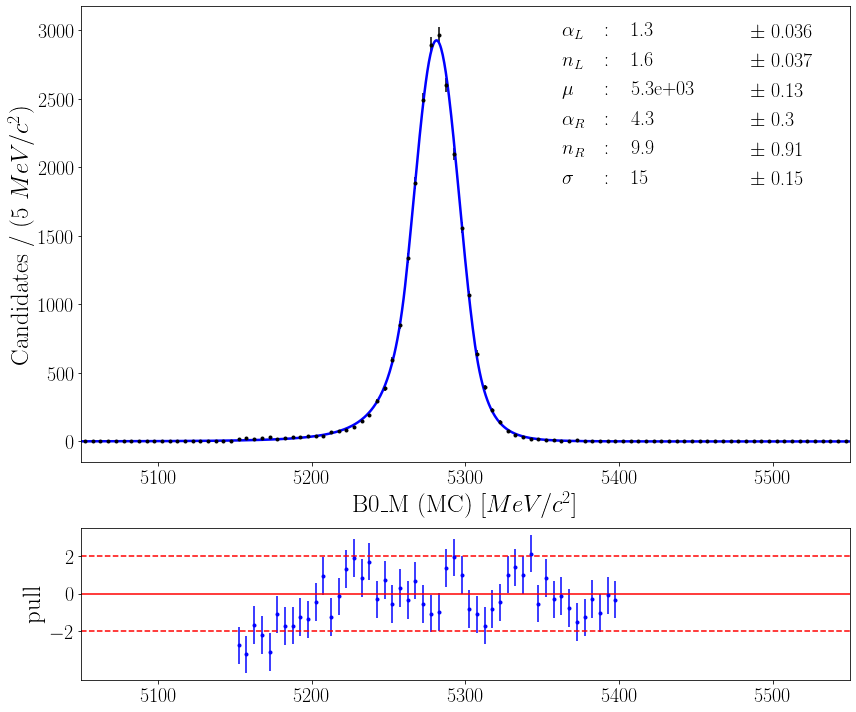

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/MC/B0_M_MC_fit.pdf


In [9]:
plot_hist_fit(df_MC,'B0_M','$MeV/c^2$',models = doubleCB_MC, obs=obs, n_bins = 100,mode_hist = False,
              name_folder = 'MC',name_data = 'MC',params=params,name_params=name_params)   